# Sales Analysis in Python

In [1]:
# import required libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Merge the 12 month of sales data

Our sales data is in different files; one for each month of 2019. Therefore, we need to combine all of them

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
sales_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    sales_data = pd.concat([sales_data, df])
    
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Cleaning the Data

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [5]:
# drop row and columns where all the values are NULL
sales_data = sales_data.dropna(how='all')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [6]:
# check for which months we have sales data 
print(sales_data['Order Date'].str[0:2].unique())

['04' '05' 'Or' '08' '09' '12' '01' '02' '03' '07' '06' '11' '10']


We have data form January to December but we also notice that there is some order dates begining with 'Or'. This will cause an issue when we try to convert the order date column from object datatype to date. Let's investigate this anomaly.

In [7]:
# rows with order date beginning with 'Or'

sales_data.loc[sales_data['Order Date'].str[0:2]=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
# Delete the rows where the order date is 'Order Date'
sales_data = sales_data.drop(sales_data.loc[sales_data['Order Date']=='Order Date'].index)

In [9]:
print(sales_data['Order Date'].str[0:2].unique())

['04' '05' '08' '09' '12' '01' '02' '03' '07' '06' '11' '10']


In [10]:
#convert columns to the correct type
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])


sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])

In [11]:
#add sales_amount column
sales_data['sales_amount'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

#add month column
sales_data['Month'] = sales_data['Order Date'].dt.month
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales_amount,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [12]:
# add a column for the city including the state
#split the purchase address by the commas
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2][1:3]})")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales_amount,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)


Now, we are ready to perform analysis and visualize the data

## Best Month for Sales

In [13]:
monthly_sales = sales_data.loc[:, ['Month','Quantity Ordered','sales_amount']].groupby('Month').sum().reset_index()
monthly_sales.head()

,Month,Quantity Ordered,sales_amount
0,1,10670,1786511.29
1,2,13162,2158127.48
2,3,16697,2755969.40
3,4,20226,3336376.42
4,5,18344,3101881.04


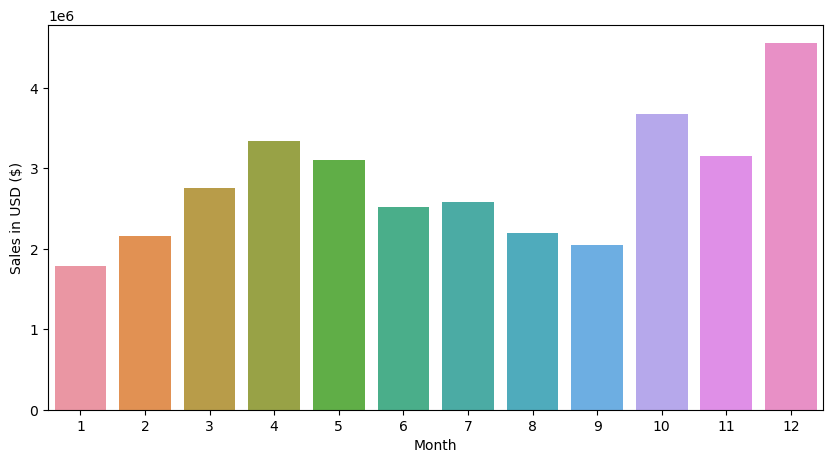

In [14]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Month', y = 'sales_amount', data = monthly_sales)
plt.ylabel('Sales in USD ($)')
plt.show()

## Which city had the highest amount of sales

In [15]:
city_sales = sales_data.loc[:, ['City','Quantity Ordered','sales_amount']].groupby('City').sum().reset_index()
city_sales

,City,Quantity Ordered,sales_amount
0,Atlanta (GA),16304,2741642.05
1,Austin (TX),10933,1786745.52
2,Boston (MA),22123,3604080.86
3,Dallas (TX),16453,2717793.72
4,Los Angeles (CA),32722,5354039.93
5,New York City (NY),27470,4581658.91
6,Portland (ME),2696,444110.53
7,Portland (OR),11110,1832538.71
8,San Francisco (CA),49363,8124120.94
9,Seattle (WA),16281,2693048.60


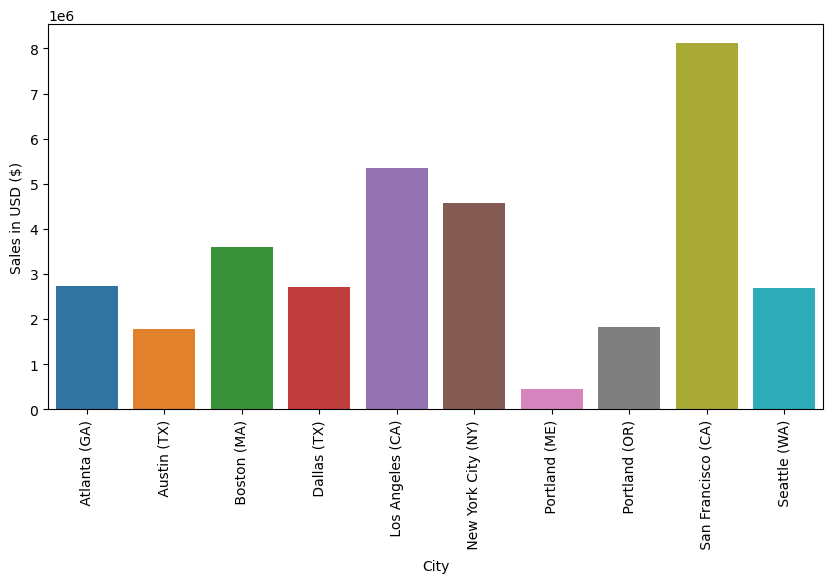

In [16]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'City', y = 'sales_amount', data = city_sales)
plt.ylabel('Sales in USD ($)')
plt.xticks(rotation=90)
plt.show()

## What products are most often sold together

In [17]:
# get all orders that have more than one item.
df = sales_data[sales_data['Order ID'].duplicated(keep=False)]
df.sort_values(by=['Order ID'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales_amount,Month,City
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.95,1,Austin (TX)
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.99,1,Austin (TX)
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",11.52,1,Los Angeles (CA)
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",150.00,1,Los Angeles (CA)
134,141365,Wired Headphones,1,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",11.99,1,New York City (NY)
...,...,...,...,...,...,...,...,...,...
25028,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",11.99,12,Portland (OR)
25040,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",700.00,12,New York City (NY)
25041,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",14.95,12,New York City (NY)
25077,319631,Lightning Charging Cable,1,14.95,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",14.95,12,Austin (TX)


In [18]:
# combine products sold in a single order
df['Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# keep only one row for each order ID
df = df[['Order ID', 'Products']].drop_duplicates()
df.head(10)

,Order ID,Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [19]:
from itertools import combinations
from collections import Counter

# count how many times a combination of 2 products occurs in the data

count = Counter()

for row in df['Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
prod_combination = pd.DataFrame(count.most_common(5))
prod_combination['Labels'] = prod_combination[0].astype(str) +"\n"+ prod_combination[1].astype(str)

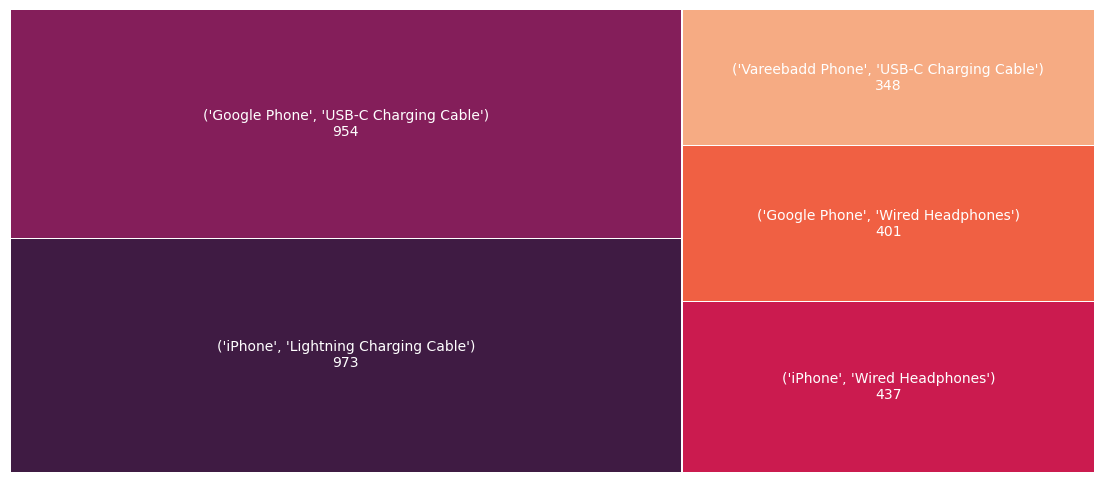

In [20]:
#visualize using tree map

import squarify

fig = plt.figure(figsize=(14,6))
squarify.plot(sizes = prod_combination[1], label = prod_combination['Labels'],
              pad = 0.2,
              text_kwargs = {'fontsize': 10, 'color': 'white'},
              color = sns.color_palette("rocket", len(prod_combination[1])),
              norm_x = 1000, 
              norm_y = 1000)

# Remove the axis:
plt.axis("off")

# plt.show() 
    
    
plt.axis("off")
plt.show()

## Visualising units sold vs unit price

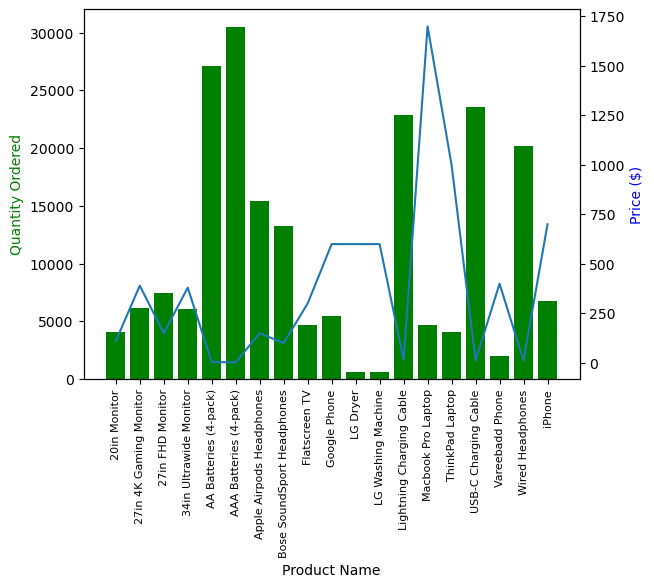

In [21]:
units_sold = sales_data.groupby('Product').sum()['Quantity Ordered'].reset_index()

unit_prices = sales_data.groupby('Product').mean()['Price Each'].reset_index()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(units_sold['Product'], units_sold['Quantity Ordered'],color='g')
ax1.set_xticklabels(units_sold['Product'],rotation='vertical', size=8)
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')

ax2.plot(unit_prices['Product'], unit_prices['Price Each'])
ax2.set_ylabel('Price ($)', color='b')

fig.show()